In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# read dataset
df = pd.read_csv('/content/train-2.csv')
df.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## EDA (Eksploratory Data Analysis)

In [ ]:
# membagi 2 variabel pada df menjadi numerical dan categorical 
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print('Jumlah numerical feats : ', len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print('Jumlah categorical_feats : ', len(categorical_feats))

Jumlah numerical feats :  15
Jumlah categorical_feats :  5


In [ ]:
# menampilkan isi dari numerical dan categorical feats
print('Numerical Features : ')
print(df[numerical_feats].columns)
print('*' * 100)
print('Categorical_feats : ')
print(df[categorical_feats].columns)

Numerical Features : 
Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')
****************************************************************************************************
Categorical_feats : 
Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')


In [ ]:
# Function untuk menampilkan persentase 
def with_per(total, axis):
  for p in axis.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center')

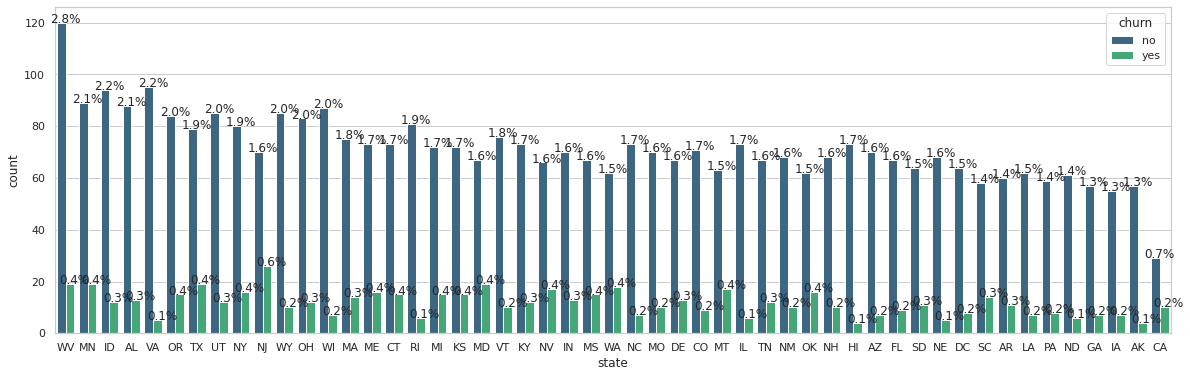

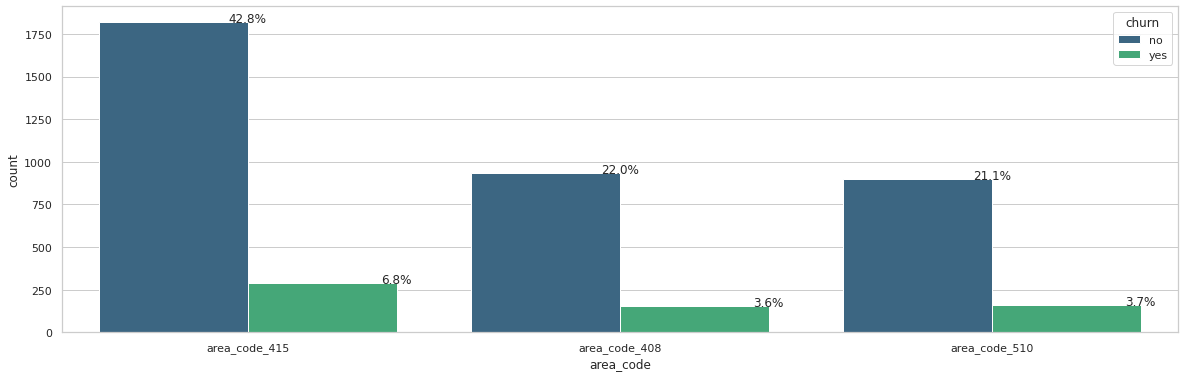

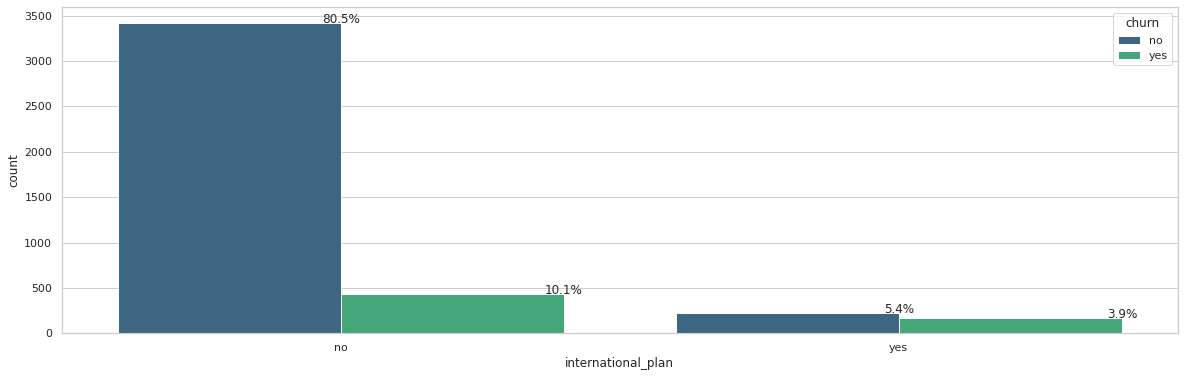

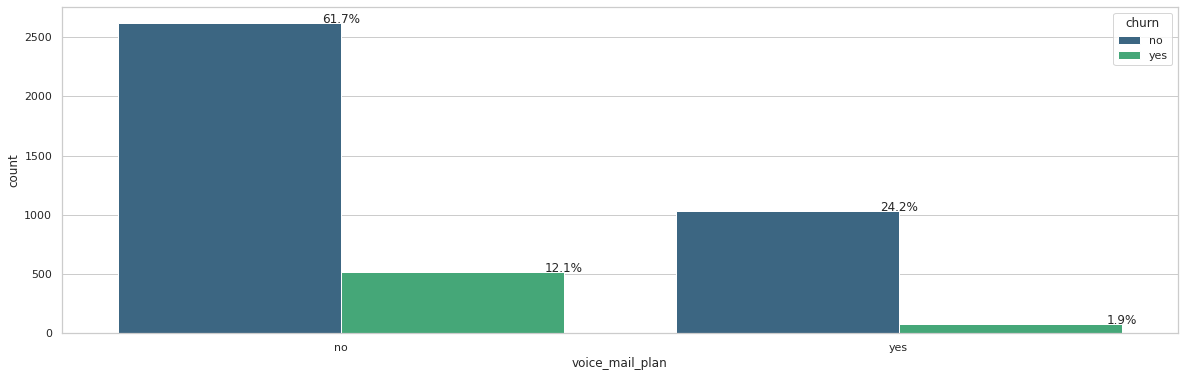

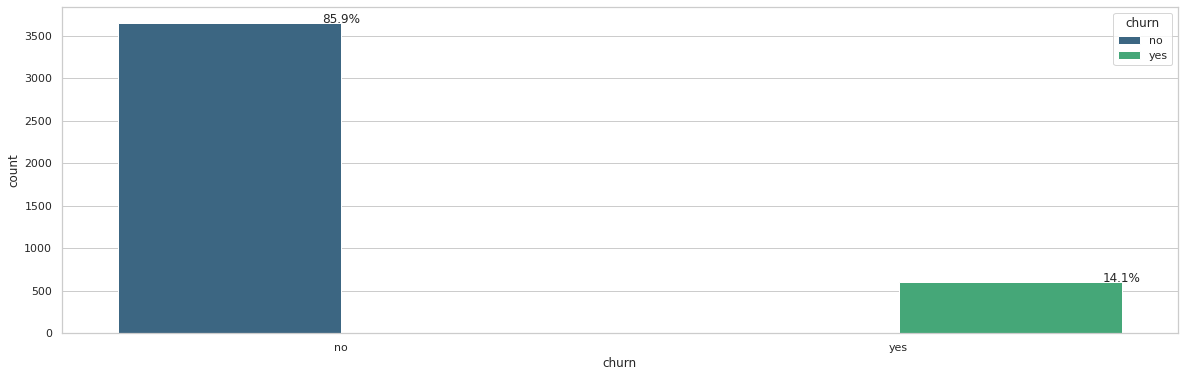

In [ ]:
# Menampilkan semua variabel kategori
for feature in categorical_feats:
  sns.set(style= 'whitegrid')
  plt.figure(figsize=(20,6))
  total = len(df)
  ax = sns.countplot(x = df [feature], data = df, order=df[feature].value_counts().index, palette='viridis', hue='churn')
  #plt.title(feature)
  with_per(total, ax)
  plt.show()

* Pengguna internation plan sedikit, dimana yang menggunakan international plan yang churn dan tidak churn cukup berimbang
* Terdapat imbalance dataset (no 85.9% dan yes 14.1%)

Skewness :  0.12232732438422539
Kurtosis :  -0.1321747749296005


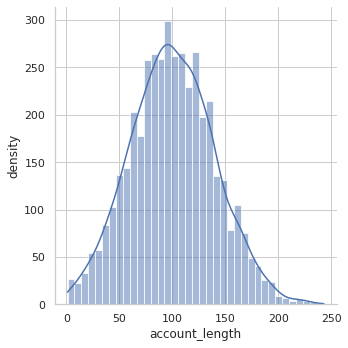

Skewness :  1.373091038123339
Kurtosis :  0.2730383374852119


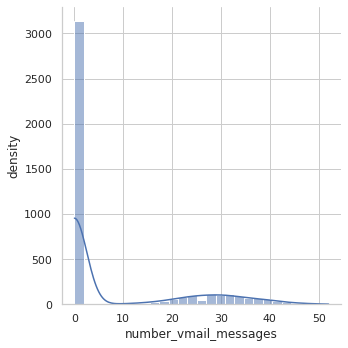

Skewness :  -0.006910229800877682
Kurtosis :  -0.05670971636638411


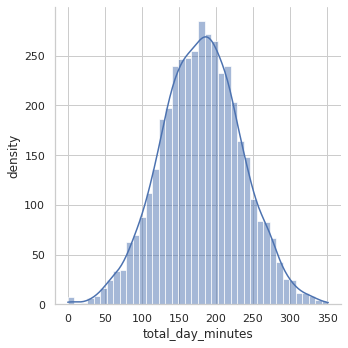

Skewness :  -0.08581246336912247
Kurtosis :  0.19359364842867732


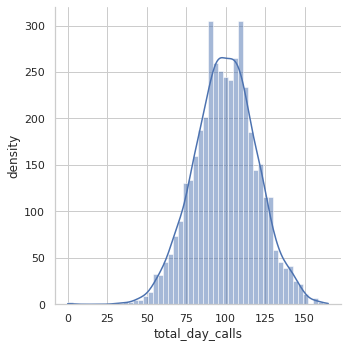

Skewness :  -0.0069125262282953735
Kurtosis :  -0.056584434504011405


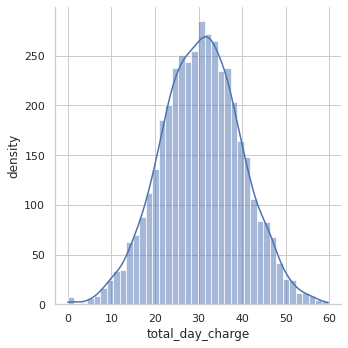

Skewness :  -0.030414586244988526
Kurtosis :  0.043453202148495684


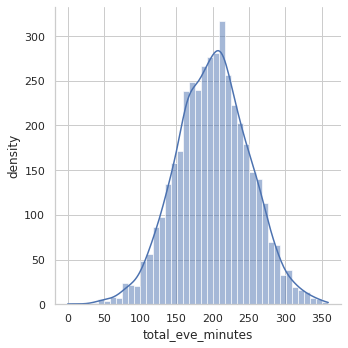

Skewness :  -0.020811823634835278
Kurtosis :  0.11459972151316133


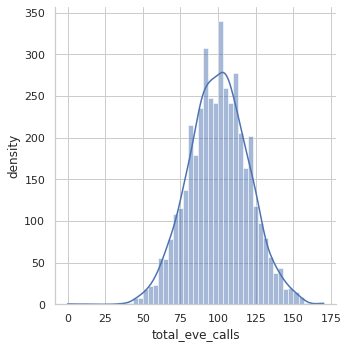

Skewness :  -0.03038789084081965
Kurtosis :  0.04332949445177814


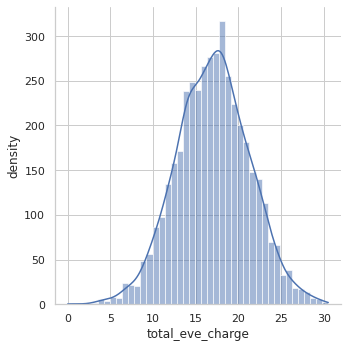

Skewness :  0.008490819348496867
Kurtosis :  0.11485357763304638


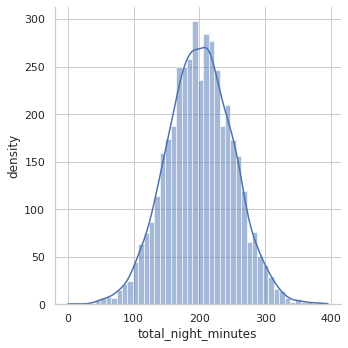

Skewness :  0.005273110226931511
Kurtosis :  0.07721835855907999


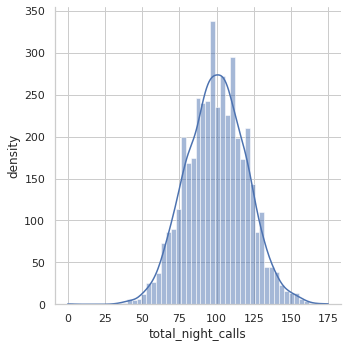

Skewness :  0.008444754040695448
Kurtosis :  0.11486517350474967


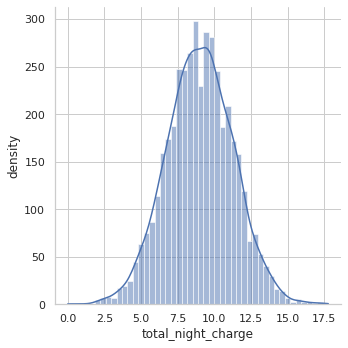

Skewness :  -0.2413595393894869
Kurtosis :  0.7029511927940337


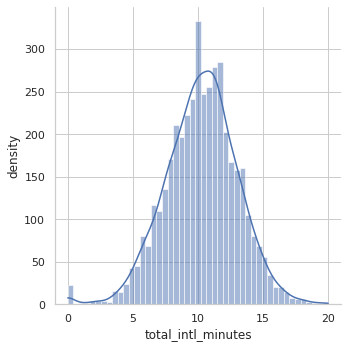

Skewness :  1.360122209275675
Kurtosis :  3.2632275248457177


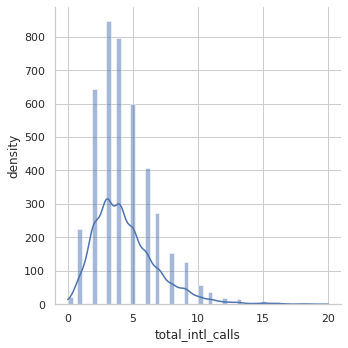

Skewness :  -0.2416706660676994
Kurtosis :  0.7033212688799968


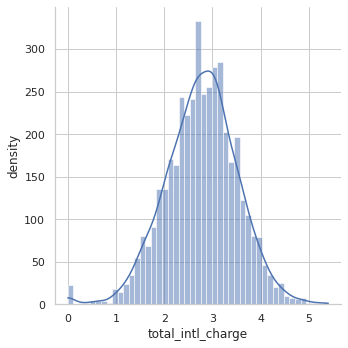

Skewness :  1.0826915855656591
Kurtosis :  1.6556187592921807


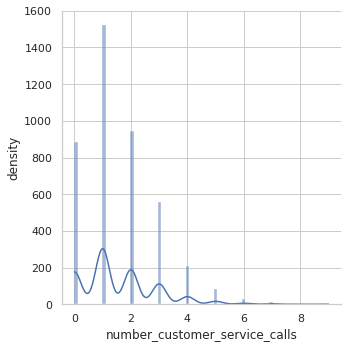

In [ ]:
# menampilkan grafik distribusi pada setiap numerical feature

for feature in numerical_feats:
  sns.displot(df[feature], kde=True)
  plt.xlabel(feature)
  plt.ylabel('density')
  print('Skewness : ', df[feature].skew())
  print('Kurtosis : ', df[feature].kurt())
  plt.show()

Terlihat pada grafik menunjukkan rata2 feature sudah mendekati distribusi normal, namun ada beberapa yang masih belum mendekati normal seperti :
1. total_intl_calls
2. number_customer_service_calls

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


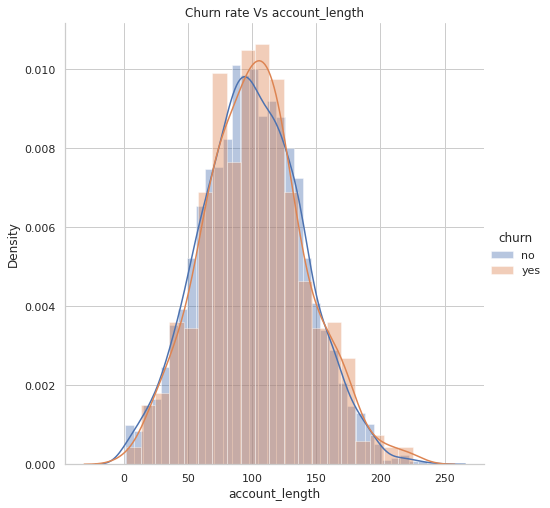

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


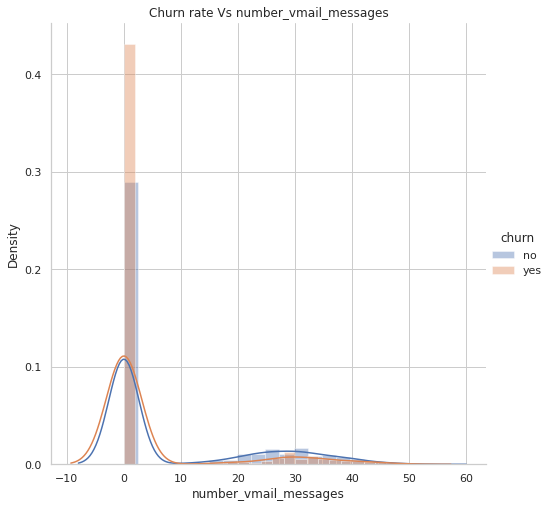

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


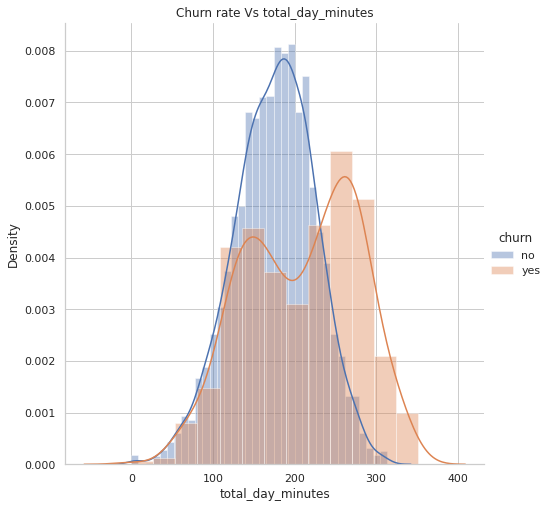

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


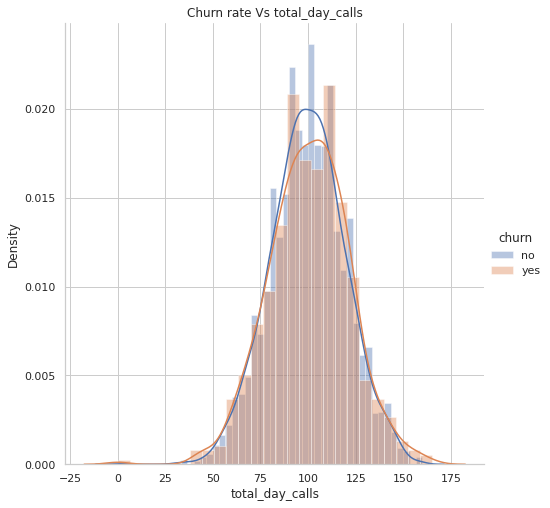

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


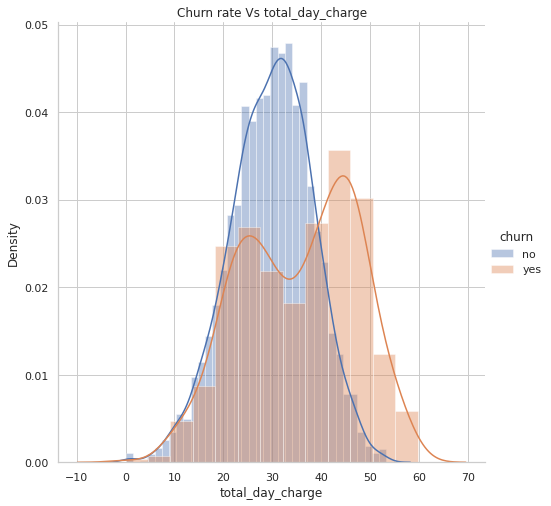

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


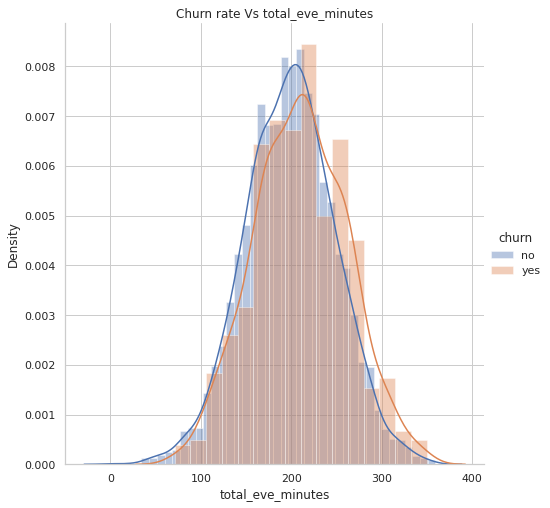

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


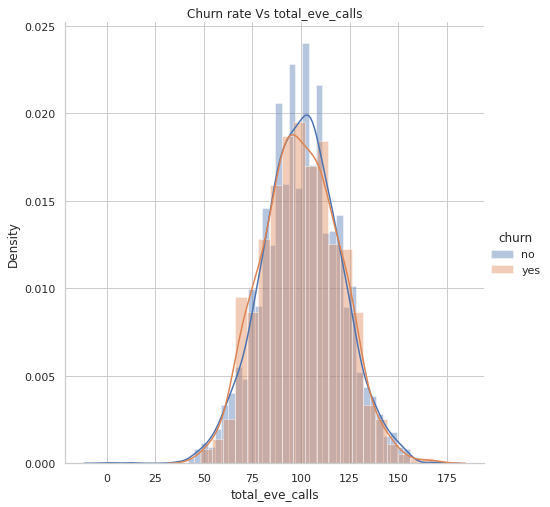

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


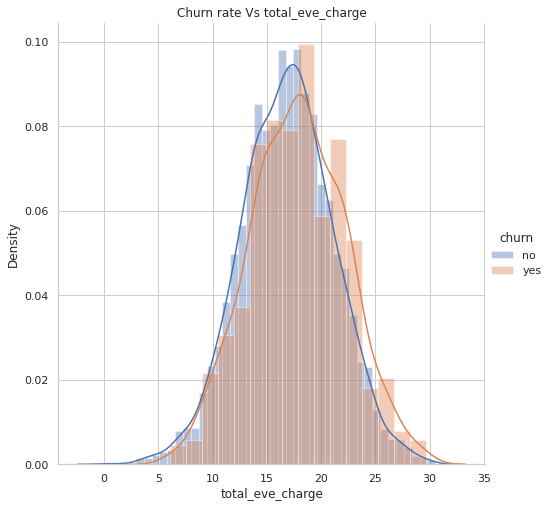

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


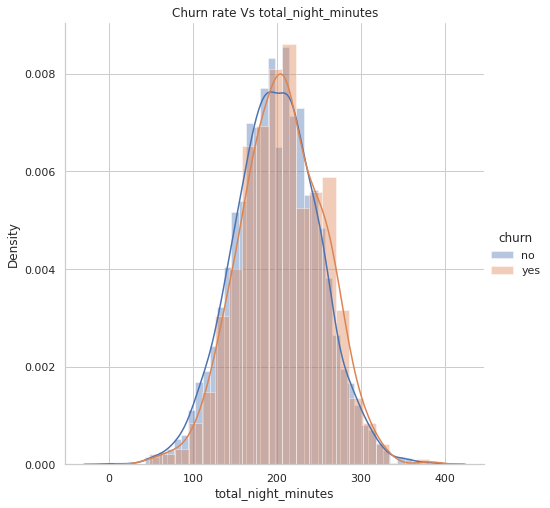

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


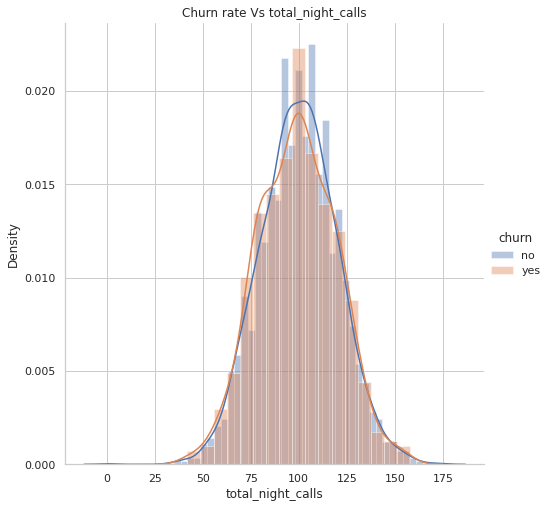

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


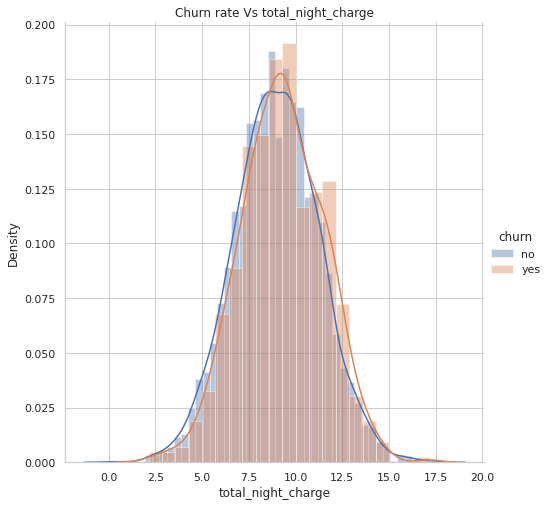

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


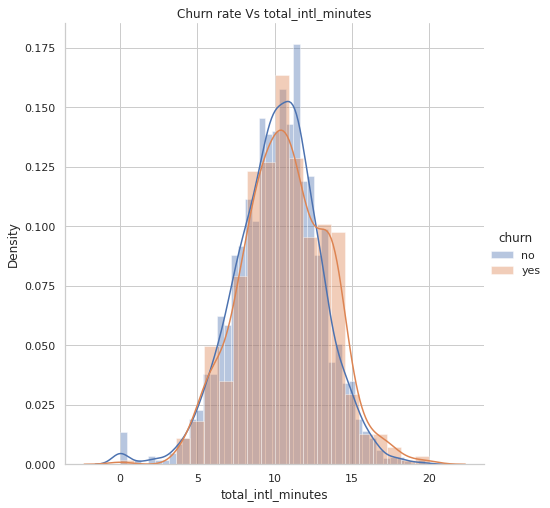

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


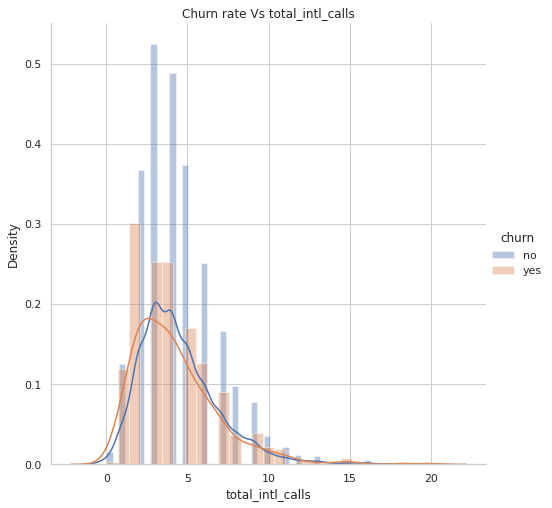

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


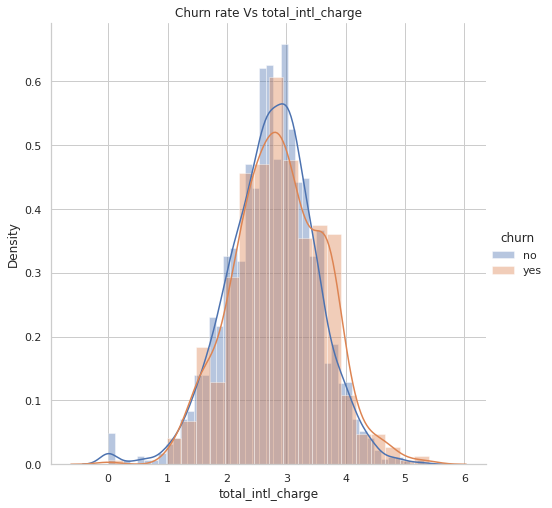

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


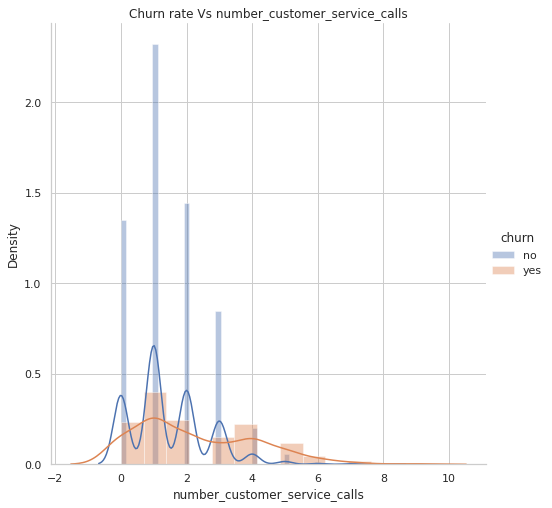

In [ ]:
for feature in numerical_feats:
	sns.FacetGrid(df, hue='churn', size=7).map(sns.distplot, feature).add_legend()
	plt.title('Churn rate Vs %s' % feature)
	plt.show()

* disini terlihat perbedaan persebaran untuk yang churn dan tidak.
* pada number_vmail_messages terdapat banyak yang churn antara 0 dan 1
* terlihat juga pada total_day_minutes, banyak yang churn ketika semakin lama telfon di siang hari
* pada total_day_charge juga terlihat, semakin besar charge pada siang hari mempengaruhi banyak yang churn 
* begitu juga pada total_eve_minutes, total_eve_charge, total_night_minutes, total_night_charge

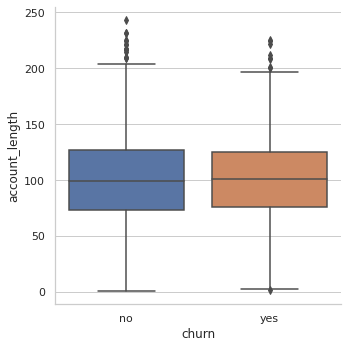

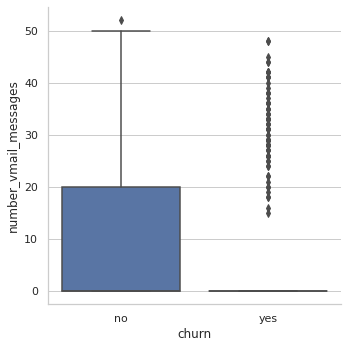

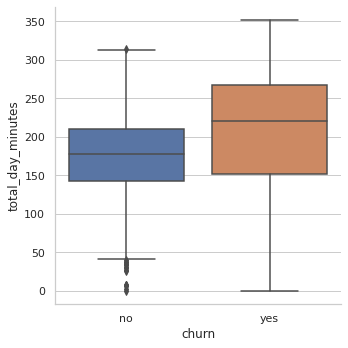

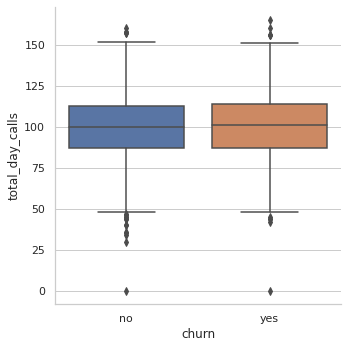

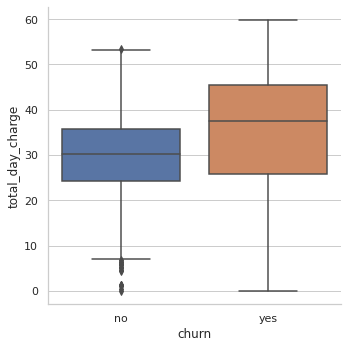

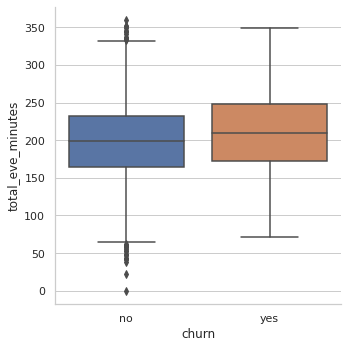

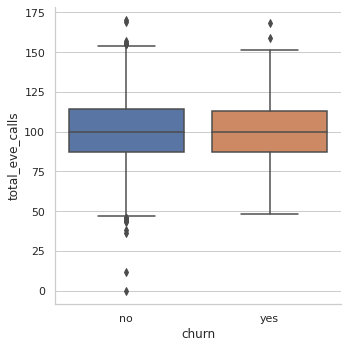

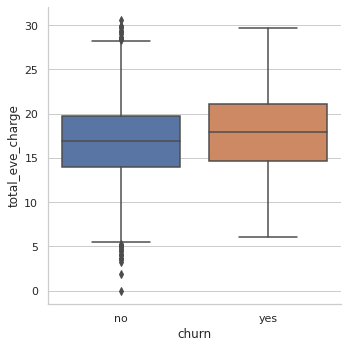

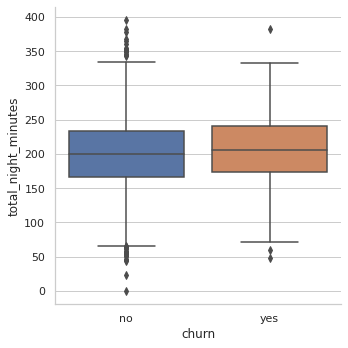

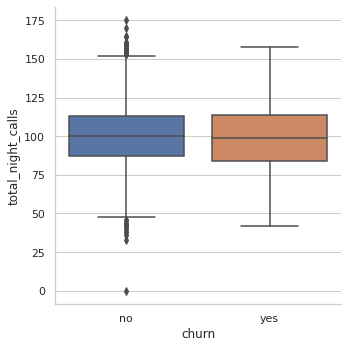

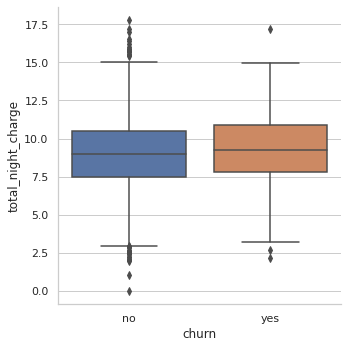

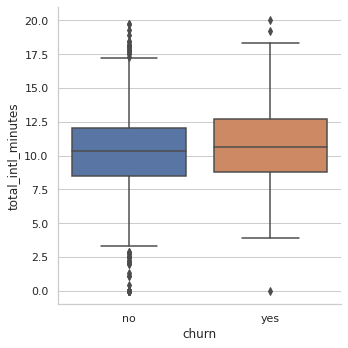

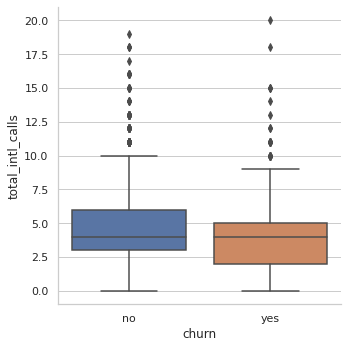

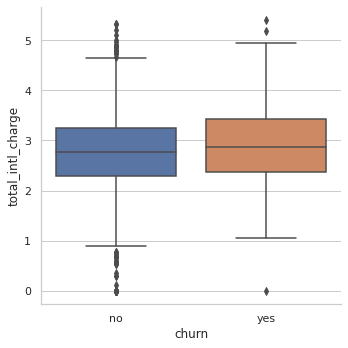

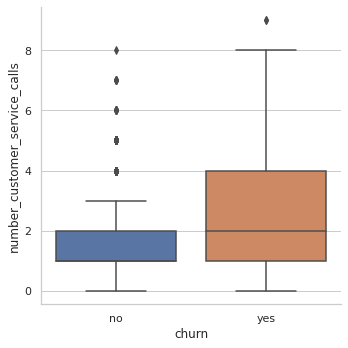

In [ ]:
# melihat sebaran data menggunakan boxplot

for feature in numerical_feats:
  sns.catplot(data=df, x='churn', y=feature, kind="box")
  plt.show()

Poin Menarik :
1. Total day minutes
2. Total day charge
3. Number CS calls

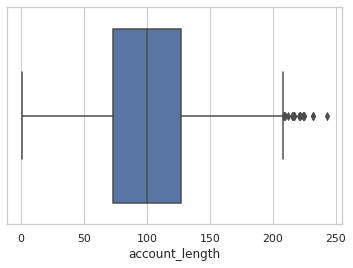

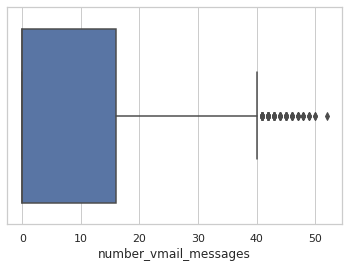

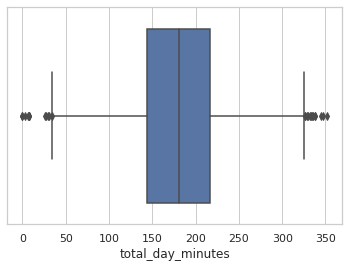

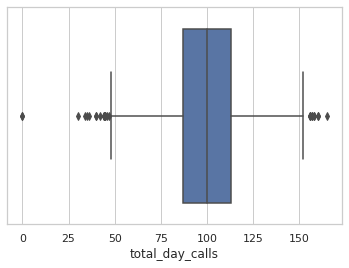

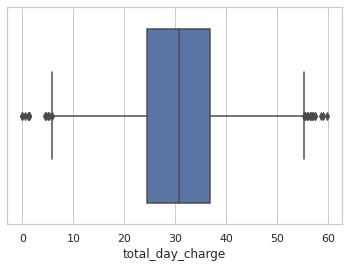

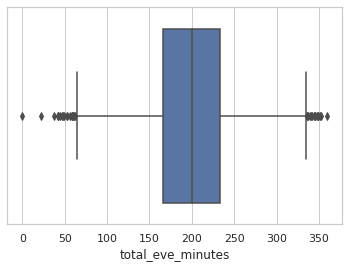

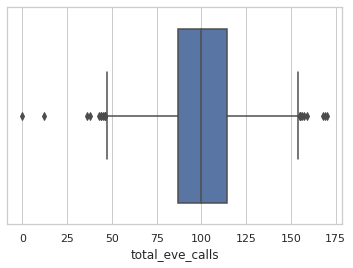

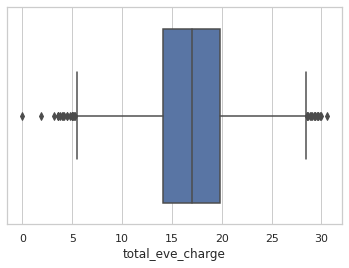

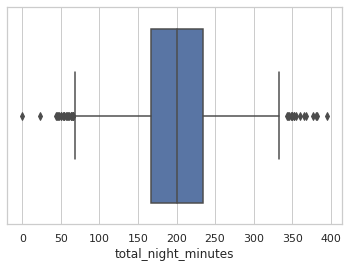

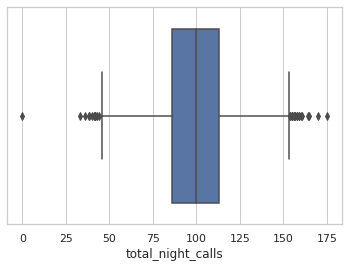

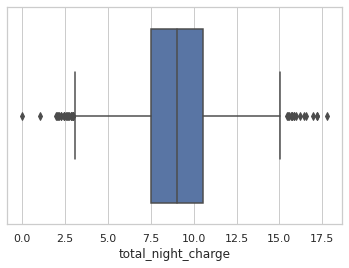

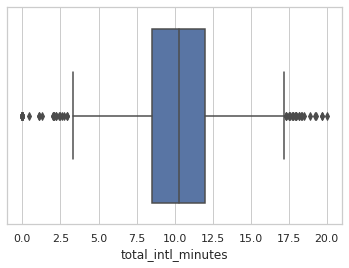

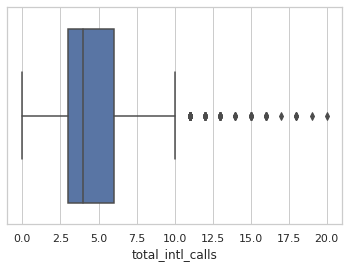

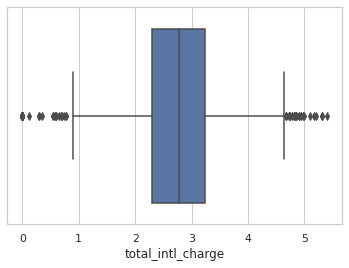

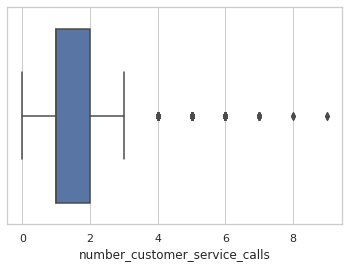

In [ ]:
# melihat outlier pada numerical feature

for b in numerical_feats:
  sns.boxplot(data=df, x=df[b])
  plt.show()

In [ ]:
# menghapus outlier pada numerical feature

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
numerical_feats

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

In [ ]:
# membuat variabel numerical feature yang akan dihapus outliers kecuali number_vmail_messages dan number_customer_service_calls

numerical_feats_outlier = ['account_length', 'total_day_minutes', 'total_day_calls', \
                           'total_day_charge', 'total_eve_minutes','total_eve_calls',\
                           'total_eve_charge', 'total_night_minutes','total_night_calls',\
                           'total_night_charge', 'total_intl_minutes','total_intl_calls',\
                           'total_intl_charge']

In [ ]:
for c in numerical_feats_outlier:
  df = remove_outlier(df, c)

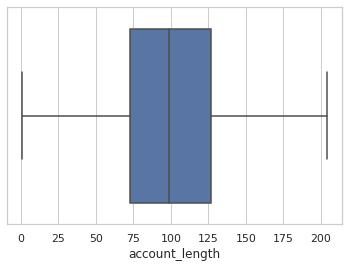

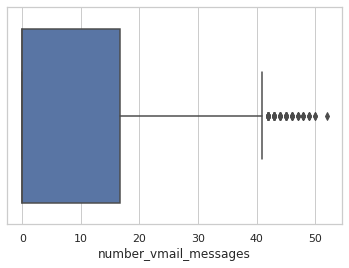

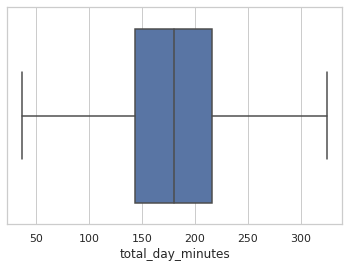

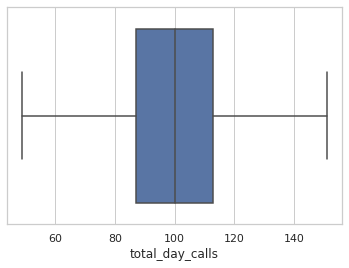

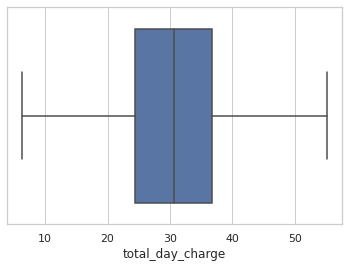

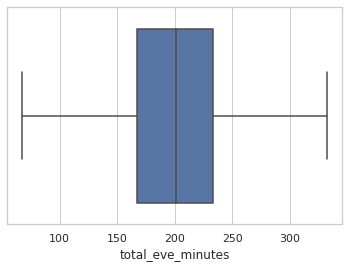

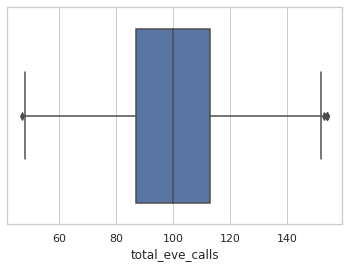

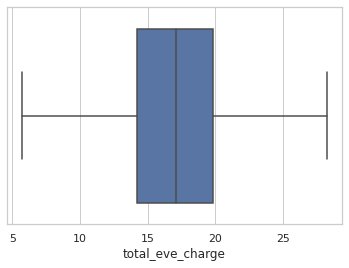

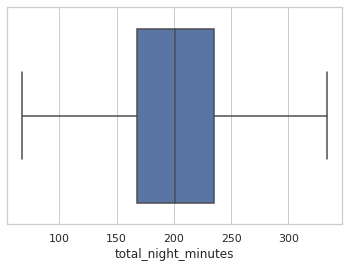

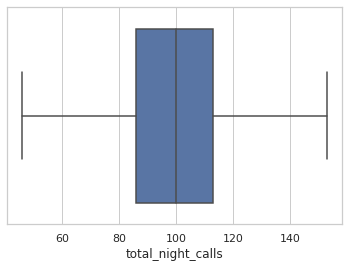

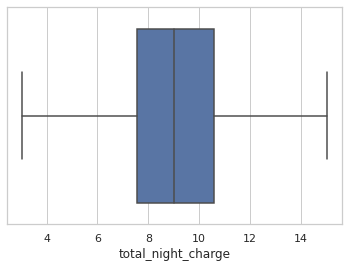

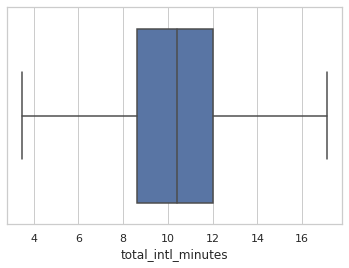

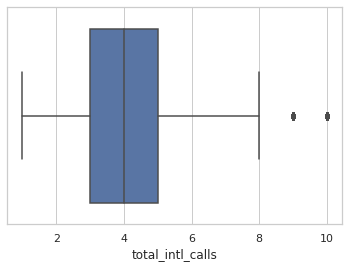

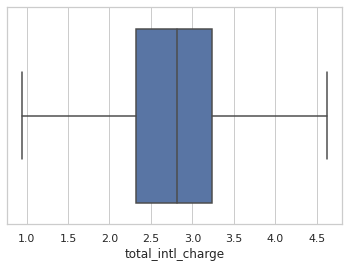

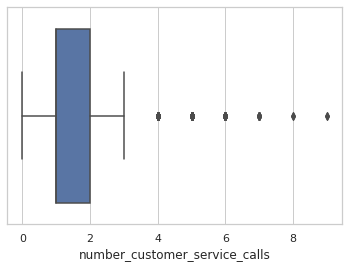

In [ ]:
# menampilkan boxplot setelah menghilangkan outliers

for b in numerical_feats:
  sns.boxplot(data=df, x=df[b])
  plt.show()

In [ ]:
# merubah yes menjadi 1 dan no menjadi 0

df['international_plan'].replace(['no','yes'], [0,1], inplace=True)
df['voice_mail_plan'].replace(['no','yes'], [0,1], inplace=True)
df['churn'].replace(['no','yes'], [0,1], inplace=True)

In [ ]:
df.head(2)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3878 entries, 0 to 4248
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          3878 non-null   object 
 1   account_length                 3878 non-null   int64  
 2   area_code                      3878 non-null   object 
 3   international_plan             3878 non-null   int64  
 4   voice_mail_plan                3878 non-null   int64  
 5   number_vmail_messages          3878 non-null   int64  
 6   total_day_minutes              3878 non-null   float64
 7   total_day_calls                3878 non-null   int64  
 8   total_day_charge               3878 non-null   float64
 9   total_eve_minutes              3878 non-null   float64
 10  total_eve_calls                3878 non-null   int64  
 11  total_eve_charge               3878 non-null   float64
 12  total_night_minutes            3878 non-null   f

In [ ]:
df = df.reset_index()

In [ ]:
# Membagi menjadi dependen dan independen variabel

X = df.drop(columns=['churn'])
y = df['churn']

In [ ]:
# melakukan encoding menggunakan onehotencoder 

from sklearn.preprocessing import OneHotEncoder

ct = OneHotEncoder()
Xct = pd.DataFrame(ct.fit_transform(X[['area_code']]).toarray(),
                   columns = ct.get_feature_names_out())

X = pd.concat([X, Xct], axis=1)
X.drop(columns=['area_code'], inplace=True)

In [ ]:
# melakukan encoding menggunakan hash encoding untuk feature state (karena terlalu banyak kategorinya)

!pip install category_encoders
import category_encoders as ce

hash_state = ce.HashingEncoder(cols='state')
encoder = hash_state.fit_transform(X['state'])

X = pd.concat([X, encoder], axis=1)
X.drop(columns=['state'], inplace=True)

X.head(2)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,index,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,OH,107,area_code_415,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
1,1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3878 entries, 0 to 3877
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          3878 non-null   int64  
 1   account_length                 3878 non-null   int64  
 2   international_plan             3878 non-null   int64  
 3   voice_mail_plan                3878 non-null   int64  
 4   number_vmail_messages          3878 non-null   int64  
 5   total_day_minutes              3878 non-null   float64
 6   total_day_calls                3878 non-null   int64  
 7   total_day_charge               3878 non-null   float64
 8   total_eve_minutes              3878 non-null   float64
 9   total_eve_calls                3878 non-null   int64  
 10  total_eve_charge               3878 non-null   float64
 11  total_night_minutes            3878 non-null   float64
 12  total_night_calls              3878 non-null   i

In [ ]:
X.drop(columns=['index'], inplace=True)

# Modelling Data

Model yang digunakan adalah :
1. KKN
2. Logistic Regression
3. SVM
4. Decission Tree
5. Random Forest
6. XGBoost

In [ ]:
# Membagi menjadi train dan test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=9)
model_kn = kn.fit(X_train, y_train)

# prediksi
pred_kn = model_kn.predict(X_test)

# evaluasi
print('Akurasi data Trainig : ',model_kn.score(X_train, y_train))
print('Akurasi data Testing : ',model_kn.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_kn))

Akurasi data Trainig :  0.9065119277885235
Akurasi data Testing :  0.8775773195876289
Accuracy Score :  0.8775773195876289


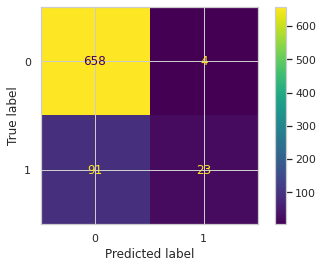

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm_knn = confusion_matrix(y_test, pred_kn, labels=model_kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=model_kn.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_kn))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       662
           1       0.85      0.20      0.33       114

    accuracy                           0.88       776
   macro avg       0.87      0.60      0.63       776
weighted avg       0.87      0.88      0.84       776



In [ ]:
# mencari parameter k terbaik untuk KNN

k_score = []

for k in range(3,20):
  kn = KNeighborsClassifier(n_neighbors=k)
  model_kn = kn.fit(X_train, y_train)

  # prediksi
  pred_kn = model_kn.predict(X_test)

  # masuk k_score
  k_score.append(accuracy_score(y_test, pred_kn))

In [ ]:
max_k_score = np.max(k_score)
max_k = k_score.index(max_k_score)

print('Best Accuracy Score : ',max_k_score, ', dengan index knn_score ke : ', max_k)

Best Accuracy Score :  0.8775773195876289 , dengan index knn_score ke :  6


index ke 6 dari 3 - 20 berarti 9

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, max_iter=10000)
model_lr = lr.fit(X_train, y_train)

# prediksi
pred_lr = model_lr.predict(X_test)

# evaluasi
print('Akurasi data Trainig : ',model_lr.score(X_train, y_train))
print('Akurasi data Testing : ',model_lr.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_lr))

Akurasi data Trainig :  0.8787878787878788
Akurasi data Testing :  0.865979381443299
Accuracy Score :  0.865979381443299


In [ ]:
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
X_train = ssc.fit_transform(X_train)
X_test = ssc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1, max_iter=10000)
model_lr = lr.fit(X_train, y_train)

# prediksi
pred_lr = model_lr.predict(X_test)

# evaluasi
print('Akurasi data Trainig : ',model_lr.score(X_train, y_train))
print('Akurasi data Testing : ',model_lr.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_lr))

Akurasi data Trainig :  0.8787878787878788
Akurasi data Testing :  0.865979381443299
Accuracy Score :  0.865979381443299


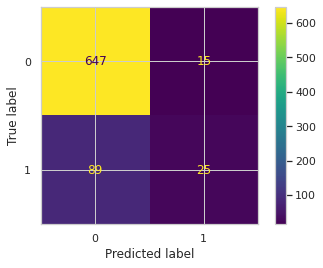

In [ ]:
cm_logreg = confusion_matrix(y_test, pred_lr, labels=model_lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=model_lr.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       662
           1       0.62      0.22      0.32       114

    accuracy                           0.87       776
   macro avg       0.75      0.60      0.63       776
weighted avg       0.84      0.87      0.84       776



## Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=9, random_state=1)
model_dt = dt.fit(X_train, y_train)

# prediksi
pred_dt = model_dt.predict(X_test)

# evaluasi
print('Akurasi data Trainig : ',model_dt.score(X_train, y_train))
print('Akurasi data Testing : ',model_dt.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_dt))

Akurasi data Trainig :  0.9806576402321083
Akurasi data Testing :  0.9355670103092784
Accuracy Score :  0.9355670103092784


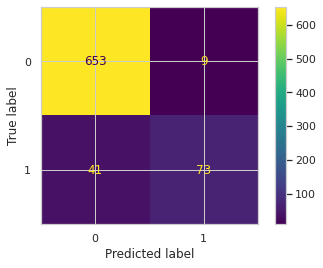

In [ ]:
cm_dt = confusion_matrix(y_test, pred_dt, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       662
           1       0.89      0.64      0.74       114

    accuracy                           0.94       776
   macro avg       0.92      0.81      0.85       776
weighted avg       0.93      0.94      0.93       776



In [ ]:
# mencari parameter max_depth terbaik

depth_score = []

for i in range(1,20):
  dt = DecisionTreeClassifier(max_depth=i, random_state=1)
  model_dt = dt.fit(X_train, y_train)

  # prediksi
  pred_dt = model_dt.predict(X_test)

  # append
  depth_score.append(accuracy_score(y_test, pred_dt))

In [ ]:
max_depth_score = np.max(depth_score)
max_depth = depth_score.index(max_depth_score)

print('Accuracy terbaik : ', max_depth_score, ', dengan index depth_score ke : ', max_depth)

Accuracy terbaik :  0.9355670103092784 , dengan index depth_score ke :  8


## SVM

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1)
model_svm = svm.fit(X_train, y_train)

# prediksi
pred_svm = model_svm.predict(X_test)

# evaluasi
print('Akurasi data Trainig : ',model_svm.score(X_train, y_train))
print('Akurasi data Testing : ',model_svm.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_svm))

Akurasi data Trainig :  0.9529335912314636
Akurasi data Testing :  0.8981958762886598
Accuracy Score :  0.8981958762886598


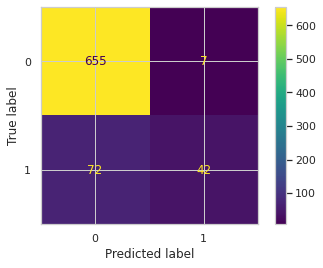

In [ ]:
cm_svm = confusion_matrix(y_test, pred_svm, labels=model_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=model_svm.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       662
           1       0.86      0.37      0.52       114

    accuracy                           0.90       776
   macro avg       0.88      0.68      0.73       776
weighted avg       0.89      0.90      0.88       776



## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, max_depth=9, random_state=1)
model_rf = rf.fit(X_train, y_train)

# prediksi
pred_rf = model_rf.predict(X_test)

# evaluasi 
print('Akurasi data Trainig : ',model_rf.score(X_train, y_train))
print('Akurasi data Testing : ',model_rf.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_rf))

Akurasi data Trainig :  0.9758220502901354
Akurasi data Testing :  0.9304123711340206
Accuracy Score :  0.9304123711340206


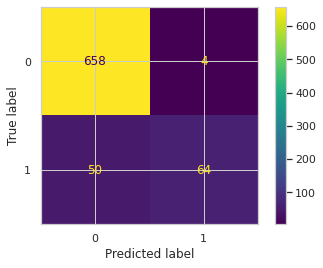

In [ ]:
cm_rf = confusion_matrix(y_test, pred_rf, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       662
           1       0.94      0.56      0.70       114

    accuracy                           0.93       776
   macro avg       0.94      0.78      0.83       776
weighted avg       0.93      0.93      0.92       776



In [ ]:
# mencari parameter n_estimators dan max_depth terbaik 

best_score = []
best_max = []
best_n = []

for n in range(100,1000,100):
  for max in range(5,10):
    rf = RandomForestClassifier(n_estimators = n, max_depth=max, random_state=1)
    model_rf = rf.fit(X_train, y_train)

    # prediksi
    pred_rf = model_rf.predict(X_test)

    # append
    best_score.append(accuracy_score(y_test, pred_rf))
    best_max.append(max)
    best_n.append(n)

In [ ]:
max_best_score = np.max(best_score)
max_best = best_score.index(max_best_score)

print('Best Accuracy Score : ',max_best_score, ', dengan index knn_score ke : ', max_best)

Best Accuracy Score :  0.9304123711340206 , dengan index knn_score ke :  14


In [ ]:
hasil_best = pd.DataFrame(best_score, columns=['best_accuracy_score'])
hasil_best['best_max'] = best_max
hasil_best['best_n'] = best_n

In [ ]:
hasil_best.iloc[max_best:max_best+1]

,best_accuracy_score,best_max,best_n
14,0.930412,9,300


# Handle Imbalance

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=1, random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Model Setelah Balance Dataset


## Decission Tree

In [ ]:
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
model_dt = dt.fit(X_smote, y_smote)

# prediksi
pred_dt = model_dt.predict(X_test)

# evaluasi
print('Akurasi data Trainig : ',model_dt.score(X_smote, y_smote))
print('Akurasi data Testing : ',model_dt.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_dt))

Akurasi data Trainig :  0.9216889880952381
Akurasi data Testing :  0.9265463917525774
Accuracy Score :  0.9265463917525774


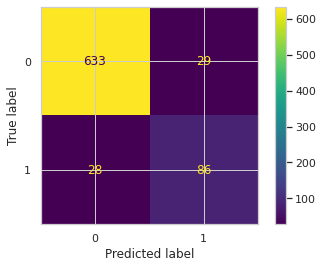

In [ ]:
cm_dt = confusion_matrix(y_test, pred_dt, labels=model_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model_dt.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       662
           1       0.75      0.75      0.75       114

    accuracy                           0.93       776
   macro avg       0.85      0.86      0.85       776
weighted avg       0.93      0.93      0.93       776



In [ ]:
depth_score = []

for i in range(1,20):
  dt = DecisionTreeClassifier(max_depth=i, random_state=1)
  model_dt = dt.fit(X_smote, y_smote)

  # prediksi
  pred_dt = model_dt.predict(X_test)

  # append
  depth_score.append(accuracy_score(y_test, pred_dt))

In [ ]:
max_depth_score = np.max(depth_score)
max_depth = depth_score.index(max_depth_score)

print('Accuracy terbaik : ', max_depth_score, ', dengan index depth_score ke : ', max_depth)

Accuracy terbaik :  0.9265463917525774 , dengan index depth_score ke :  5


## Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, max_depth=9, random_state=1)
model_rf = rf.fit(X_smote, y_smote)

# prediksi
pred_rf = model_rf.predict(X_test)

# evaluasi 
print('Akurasi data Trainig : ',model_rf.score(X_smote, y_smote))
print('Akurasi data Testing : ',model_rf.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, pred_rf))

Akurasi data Trainig :  0.94921875
Akurasi data Testing :  0.9329896907216495
Accuracy Score :  0.9329896907216495


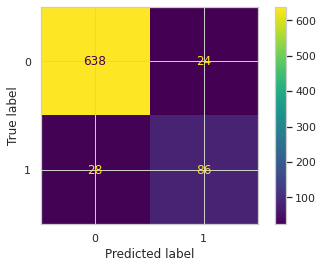

In [ ]:
cm_rf = confusion_matrix(y_test, pred_rf, labels=model_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model_rf.classes_)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       662
           1       0.78      0.75      0.77       114

    accuracy                           0.93       776
   macro avg       0.87      0.86      0.86       776
weighted avg       0.93      0.93      0.93       776



In [ ]:
# mencari parameter n_estimators dan max_depth terbaik 

best_score = []
best_max = []
best_n = []

for n in range(100,1000,100):
  for max in range(5,10):
    rf = RandomForestClassifier(n_estimators = n, max_depth=max, random_state=1)
    model_rf = rf.fit(X_smote, y_smote)

    # prediksi
    pred_rf = model_rf.predict(X_test)

    # append
    best_score.append(recall_score(y_test, pred_rf))
    best_max.append(max)
    best_n.append(n)

In [ ]:
max_best_score = np.max(best_score)
max_best = best_score.index(max_best_score)

print('Best recall Score : ',max_best_score, ', dengan index best_score ke : ', max_best)

Best recall Score :  0.7543859649122807 , dengan index best_score ke :  0


In [ ]:
hasil_best = pd.DataFrame(best_score, columns=['best_accuracy_score'])
hasil_best['best_max'] = best_max
hasil_best['best_n'] = best_n

In [ ]:
hasil_best.iloc[max_best:max_best+1]

,best_accuracy_score,best_max,best_n
24,0.93299,9,500


## LightGBM

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_smote, label=y_smote)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 20
params['min_data'] = 50
params['max_depth'] = 10
clf = lgb.train(params, d_train, 100)

In [ ]:
# prediksi
pred_dt = clf.predict(X_test)

# evaluasi
print('Accuracy Score : ', accuracy_score((pred_dt > 0.5), y_test))

Accuracy Score :  0.9188144329896907


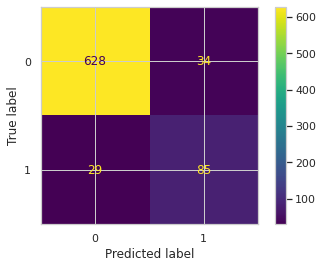

In [ ]:
cm_dt = confusion_matrix(y_test, (pred_dt > 0.5))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test, (pred_dt > 0.5)))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       662
           1       0.71      0.75      0.73       114

    accuracy                           0.92       776
   macro avg       0.84      0.85      0.84       776
weighted avg       0.92      0.92      0.92       776



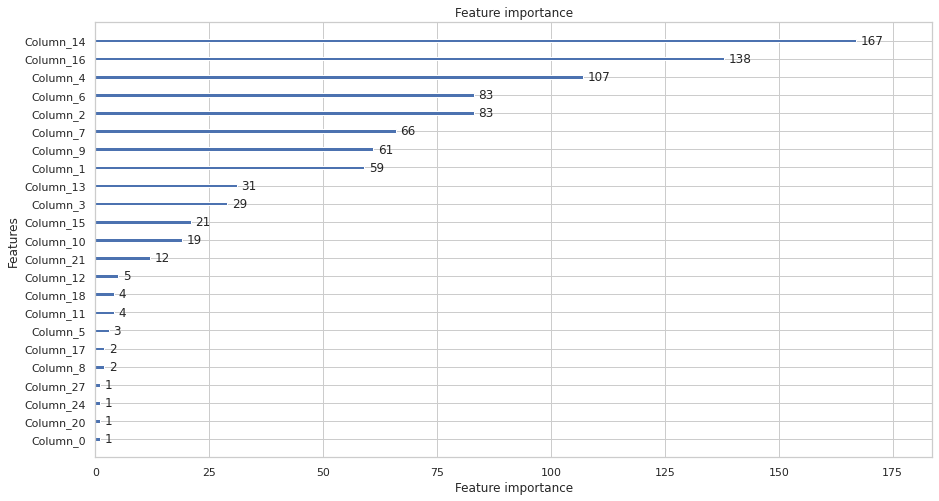

In [ ]:
# feature importance menggunakan LGBM
from lightgbm.plotting import plot_importance
plot_importance(clf, figsize=(15,8))